## Basics

In [1]:
def get_results_for_p(p,all_results):
    # Create the key as a tuple
    key = (p.num_z,p.num_v,p.num_n,p.n_bar,p.num_q,p.q_0,p.prod_q,p.hire_c,p.k_entry,p.k_f,p.prod_alpha,p.dt)
    # Check if the key exists in the saved results
    if key in all_results:
        print(key)
        return all_results[key]
    else:
        print(f"No results found for p = {key}")
        return None

from primitives import Parameters
p = Parameters()
import pickle
import matplotlib.pyplot as plt
import numpy as np
from plots import Plots
import cProfile
import pstats

plts=Plots(p)
cc_J,cc_W,cc_Wstar,cc_Jpi,cc_pc,mwc_J,mwc_W,mwc_Wstar,mwc_pc,mwc_n1,mwc_s_J,mwc_s_W,mwc_s_Wstar,mwc_s_sep,mwc_sd_J,mwc_sd_W,mwc_sd_Wstar,mwc_sd_sep=None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None

In [2]:
# Load the temp objects
try:
    with open('my_objects.pkl', 'rb') as file:
        objects = pickle.load(file)
except FileNotFoundError:
    # If the file doesn't exist, start with an empty dictionary
    objects = {}

# Load the permanent results, for sep, across different parametrizations
with open("results_hmq_sep.pkl", "rb") as file:
    all_results = pickle.load(file)
results = get_results_for_p(p,all_results)

No results found for p = (3, 100, 5, 4, 6, 0.5, 0.5, 5.0, 25.0, 0.0, 0.5, 0.25)


In [ ]:
from ContinuousContract import ContinuousContract
cc=ContinuousContract(p)
(cc_J,cc_W,cc_Wstar,cc_Jpi,cc_pc)=cc.J(1)

In [6]:
from Multiworker_Contract_GE import MultiworkerContract
K=2 #number of tenure levels
mwc_GE=MultiworkerContract(p)

In [9]:
mwc_GE.v_0

-66.2021994679685

In [8]:
mwc_GE.v_grid[99] #this is the 1-period utility

121.50247952128905

In [10]:
from primitives import Preferences
pref = Preferences(p)

In [11]:
mwc_GE.v_grid[10]-mwc_GE.v_grid[0]

18.960068584773495

In [21]:
mwc_GE.unemp_bf

array([1.43712876])

In [13]:
pref.inv_utility(mwc_GE.v_grid[99]-mwc_GE.v_grid[0])

3.3045042324442726e+81

In [5]:
# GE basic
mwc_GE_J = objects['mwc_GE_J']
mwc_GE_W = objects['mwc_GE_W']
#mwc_GE_J = objects['mwc_hmq_sd_J']
#mwc_GE_W = objects['mwc_hmq_sd_W']


(mwc_GE_J,mwc_GE_W,mwc_GE_Wstar,mwc_GE_sep,mwc_GE_n0,mwc_GE_n1)=mwc_GE.J(mwc_GE_J,mwc_GE_W,1)

objects['mwc_GE_J'] = mwc_GE_J
objects['mwc_GE_W'] = mwc_GE_W
 
with open('my_objects.pkl', 'wb') as file:
    pickle.dump(objects, file)

Ji shape (3, 5, 5, 100, 6)
W1i shape (3, 5, 5, 100, 6, 2)
Slow kappa method
kappa 25.343883339222387
signon [1.43712876e+00 4.29266398e+00 1.28220690e+01 3.82991667e+01
 1.14398555e+02 3.41705331e+02 1.02066441e+03 3.04869645e+03
 9.10637227e+03 2.72004830e+04 8.12470929e+04 2.42682827e+05
 7.24886916e+05 2.16521724e+06 6.46744421e+06 1.93180776e+07
 5.77025653e+07 1.72355972e+08 5.14822539e+08 1.53776073e+09
 4.59324892e+09 1.37199079e+10 4.09809869e+10 1.22409078e+11
 3.65632543e+11 1.09213433e+12 3.26217513e+12 9.74402721e+12
 2.91051407e+13 8.69362531e+13 2.59676192e+14 7.75645628e+14
 2.31683211e+15 6.92031366e+15 2.06707862e+16 6.17430685e+16
 1.84424844e+17 5.50871925e+17 1.64543926e+18 4.91488171e+18
 1.46806162e+19 4.38505960e+19 1.30980521e+20 3.91235208e+20
 1.16860878e+21 3.49060222e+21 1.04263326e+22 3.11431682e+22
 9.30237849e+22 2.77859482e+23 8.29958613e+23 2.47906350e+24
 7.40489435e+24 2.21182153e+25 6.60664996e+25 1.97338813e+26
 5.89445596e+26 1.76065775e+27 5.25903

c:\Users\andre\Codes\Multi-worker firm\Multiworker_wage_2steps\primitives.py:184: RuntimeWarning: invalid value encountered in power
  return np.power( np.power(self.p.alpha/q,self.p.sigma) - np.power(self.p.alpha,self.p.sigma), 1 / self.p.sigma )
c:\Users\andre\Codes\Multi-worker firm\Multiworker_wage_2steps\search.py:155: RuntimeWarning: invalid value encountered in power
  self.e0 = -np.power(-self.x[0]/self.x[1], 1/self.x[2]) + self.e_asy #Andrei: This is the crossing point of the function, where p(v) = 0.


AssertionError: asymptote point is not larger than 0 crossing

In [5]:
# GE separations
if results is None:
    mwc_GE_s_J = objects['mwc_GE_J']
    mwc_GE_s_W = objects['mwc_GE_W']
else:
    mwc_GE_s_J = results['Ji']
    mwc_GE_s_W = results['W1i']

(mwc_GE_s_J,mwc_GE_s_W,mwc_GE_s_Wstar,mwc_GE_s_sep,mwc_GE_s_n0,mwc_GE_s_n1)=mwc_GE.J_sep_dir(objects['mwc_hmq_sd_J'],objects['mwc_hmq_sd_W'],1)

objects['mwc_GE_s_J'] = mwc_GE_s_J
objects['mwc_GE_s_W'] = mwc_GE_s_W
 
with open('my_objects.pkl', 'wb') as file:
    pickle.dump(objects, file)

Ji shape (3, 5, 5, 100, 6)
W1i shape (3, 5, 5, 100, 6, 2)
Slow kappa method
kappa 50.0
signon [1.00023303 1.01905294 1.03826309 1.05787234 1.07788975 1.0983246
 1.11918641 1.14048492 1.16223014 1.18443229 1.20710188 1.23024965
 1.25388664 1.27802415 1.30267376 1.32784734 1.35355707 1.37981543
 1.40663522 1.43402956 1.4620119  1.49059603 1.51979611 1.54962664
 1.5801025  1.61123894 1.64305163 1.67555661 1.70877035 1.74270975
 1.77739213 1.81283527 1.84905742 1.88607728 1.92391407 1.96258749
 2.00211776 2.04252562 2.08383239 2.12605992 2.16923063 2.21336757
 2.25849438 2.30463531 2.35181528 2.40005988 2.44939535 2.49984867
 2.55144752 2.60422034 2.65819632 2.71340545 2.76987852 2.82764718
 2.88674391 2.94720208 3.009056   3.07234088 3.1370929  3.20334927
 3.27114818 3.34052889 3.41153175 3.48419822 3.55857092 3.63469363
 3.71261139 3.79237046 3.87401842 3.95760417 4.04317799 4.13079158
 4.22049809 4.31235219 4.40641008 4.50272956 4.6013701  4.70239285
 4.80586069 4.91183833 5.02039234 5.

KeyboardInterrupt: 

In [26]:
pe, re = mwc_GE.js.solve_search_choice(mwc_GE_W)

In [28]:
re.max()

166.12349949503414

In [29]:
mwc_GE.v_grid

array([-57.41877003, -55.33388763, -53.24900522, -51.16412282,
       -49.07924042, -46.99435802, -44.90947561, -42.82459321,
       -40.73971081, -38.65482841, -36.569946  , -34.4850636 ,
       -32.4001812 , -30.31529879, -28.23041639, -26.14553399,
       -24.06065159, -21.97576918, -19.89088678, -17.80600438,
       -15.72112198, -13.63623957, -11.55135717,  -9.46647477,
        -7.38159237,  -5.29670996,  -3.21182756,  -1.12694516,
         0.95793724,   3.04281965,   5.12770205,   7.21258445,
         9.29746685,  11.38234926,  13.46723166,  15.55211406,
        17.63699647,  19.72187887,  21.80676127,  23.89164367,
        25.97652608,  28.06140848,  30.14629088,  32.23117328,
        34.31605569,  36.40093809,  38.48582049,  40.57070289,
        42.6555853 ,  44.7404677 ,  46.8253501 ,  48.9102325 ,
        50.99511491,  53.07999731,  55.16487971,  57.24976211,
        59.33464452,  61.41952692,  63.50440932,  65.58929173,
        67.67417413,  69.75905653,  71.84393893,  73.92

In [4]:
from Multiworker_Contract_hire_hmq import MultiworkerContract
K=2 #number of tenure levels
mwc_hmq=MultiworkerContract(p,cc.js)

In [ ]:
# HMQ Separations
if results is None:
    mwc_hmq_sd_J = objects['mwc_hmq_sd_J']
    mwc_hmq_sd_W = objects['mwc_hmq_sd_W']
else:
    mwc_hmq_sd_J = results['Ji']
    mwc_hmq_sd_W = results['W1i']

(mwc_hmq_sd_J,mwc_hmq_sd_W,mwc_hmq_sd_Wstar,mwc_hmq_sd_sep,mwc_hmq_sd_n0,mwc_hmq_sd_n1)=mwc_hmq.J_sep_dir()

objects['mwc_hmq_sd_J'] = mwc_hmq_sd_J
objects['mwc_hmq_sd_W'] = mwc_hmq_sd_W
 
with open('my_objects.pkl', 'wb') as file:
    pickle.dump(objects, file)

In [ ]:
# HMQ
mwc_hmq_J = objects['mwc_hmq_J']
mwc_hmq_W = objects['mwc_hmq_W']

profiler = cProfile.Profile()
profiler.enable()
#(mwc_hmq_J,mwc_hmq_W,mwc_hmq_Wstar,mwc_hmq_pc,mwc_hmq_n0,mwc_hmq_n1)=mwc_hmq.J()
(mwc_hmq_J,mwc_hmq_W,mwc_hmq_Wstar,mwc_hmq_pc,mwc_hmq_n0,mwc_hmq_n1)=mwc_hmq.J()
profiler.disable()

# Print profiling results
stats = pstats.Stats(profiler).sort_stats(pstats.SortKey.TIME)
stats.print_stats()
#still to do: introduce HMQ into the separations.
#also gotta check that his actually works.
#also this seems slow af
objects['mwc_hmq_J'] = mwc_hmq_J
objects['mwc_hmq_W'] = mwc_hmq_W

with open('my_objects.pkl', 'wb') as file:
    pickle.dump(objects, file)

In [ ]:
from Multiworker_Contract_all import MultiworkerContract
K=2 #number of tenure levels
mwc=MultiworkerContract(p,cc.js)
(mwc_J,mwc_W,mwc_Wstar,mwc_pc,mwc_n0,mwc_n1)=mwc.J()


# Plots

In [9]:
def plot_GE(prod1,prod2,jun1,sen1,jun2,sen2,qual,minwage=0,hiresub=0, save=0):       
 
        plt.figure(figsize=(16, 6))  # Width=16 inches, Height=6 inches

        # First subplot
        plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
        prod=prod1
        jun=jun1
        sen=sen1
       
        plt.plot(mwc_GE_W[prod1, jun, sen, :, qual ,1], mwc_GE_J[prod1, jun, sen, :, qual], label='Baseline')
        if mwc_GE_s_W is not None:
          plt.plot(mwc_GE_s_W[prod1, jun, sen, :, qual ,1], mwc_GE_s_J[prod1, jun, sen, :, qual], label='With separations')


     

        if prod1 == 2:
          plt.title(f'Firm Value, Boom, {jun} juniors and {sen} seniors')
        elif prod1 == 0:
          plt.title(f'Firm Value, Recession, {jun} juniors and {sen} seniors')
        else:
          plt.title(f'Firm Value, {prod} productivity, {jun} juniors and {sen} seniors')
        plt.xlabel('Senior Worker value')
        plt.ylabel('Firm Value')
        plt.legend()
        # Second subplot
        plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
        prod=prod2
        jun=jun2
        sen=sen2
        plt.plot(mwc_GE_W[prod2, jun, sen, :, qual ,1], mwc_GE_J[prod2, jun, sen, :, qual], label='Baseline')
        if mwc_GE_s_W is not None:
          plt.plot(mwc_GE_s_W[prod2, jun, sen, :, qual ,1], mwc_GE_s_J[prod2, jun, sen, :, qual], label='With separations')

       
        # Adjust layout to prevent overlap
        if prod2 == 2:
          plt.title(f'Firm Value, Boom, {jun} juniors and {sen} seniors')
        elif prod2 == 0:
          plt.title(f'Firm Value, Recession, {jun} juniors and {sen} seniors')
        else:
          plt.title(f'Firm Value, {prod} productivity, {jun} juniors and {sen} seniors')
        plt.xlabel('Senior Worker value')
        plt.ylabel('Firm Value')
        plt.legend()       
        
        plt.tight_layout()

        if save==1:
          plt.savefig(os.path.join(output_dir,'General Equilibrium Value Function.png'), bbox_inches='tight')  # Save as PNG

        # Show the plot (optional)
        plt.show()

NameError: name 'mwc_GE_s_W' is not defined

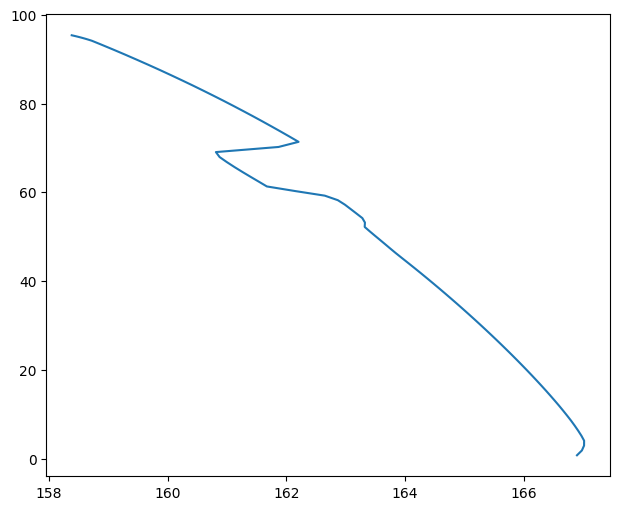

In [16]:
plot_GE(2,0,    1,2,    1,1,    0,  0,0,    0)

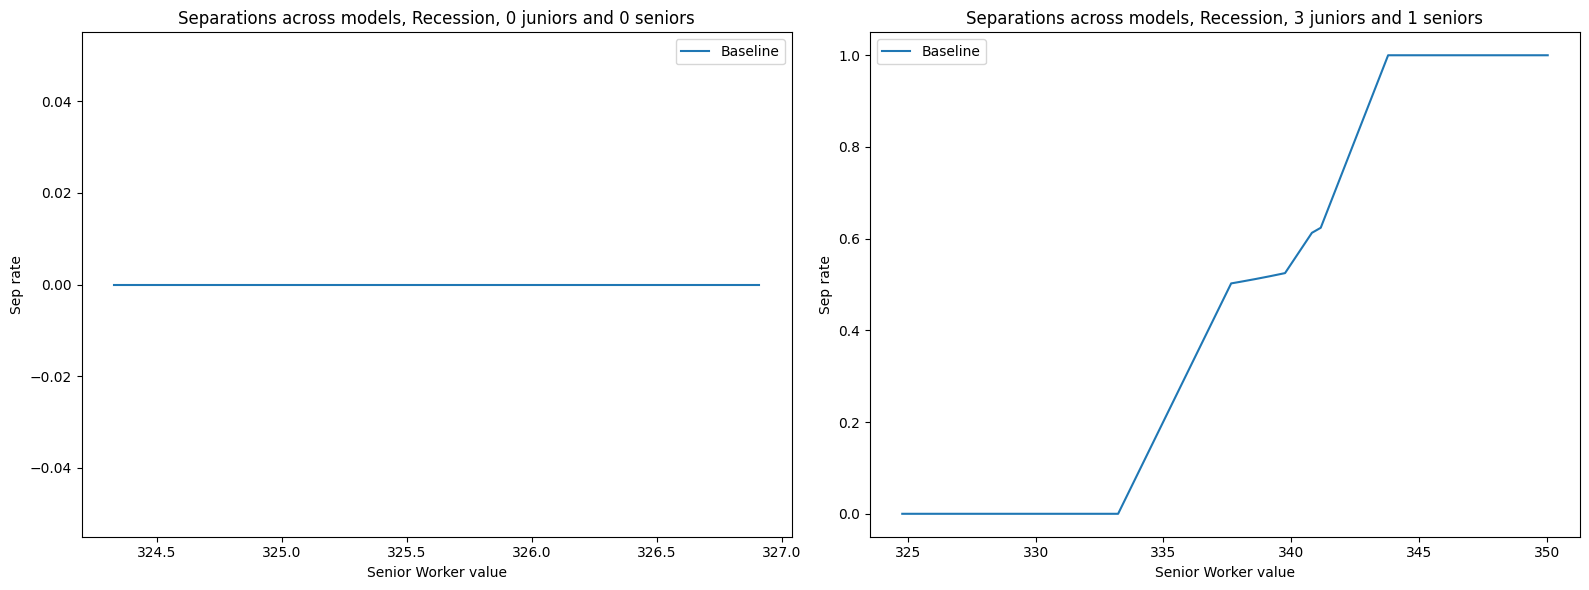

In [14]:
plot_sep(0,0,    0,0,    3,1,    0,  0,0,    0)

In [11]:
def plot_sep(prod1,prod2,jun1,sen1,jun2,sen2,qual,minwage=0,hiresub=0, save=0):       
 
        plt.figure(figsize=(16, 6))  # Width=16 inches, Height=6 inches

        # First subplot
        plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
        prod=prod1
        jun=jun1
        sen=sen1

        plt.plot(mwc_GE_s_W[prod1, jun, sen, :, qual ,1], mwc_GE_s_sep[prod1, jun, sen, :, qual], label='Baseline')

     

        if prod1 == 2:
          plt.title(f'Separations across models, Boom, {jun} juniors and {sen} seniors')
        elif prod1 == 0:
          plt.title(f'Separations across models, Recession, {jun} juniors and {sen} seniors')
        else:
          plt.title(f'Separations across models, {prod} productivity, {jun} juniors and {sen} seniors')
        plt.xlabel('Senior Worker value')
        plt.ylabel('Sep rate')
        plt.legend()
        # Second subplot
        plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
        prod=prod2
        jun=jun2
        sen=sen2

        plt.plot(mwc_GE_s_W[prod2, jun, sen, :, qual ,1], mwc_GE_s_sep[prod2, jun, sen, :, qual], label='Baseline')
        # Adjust layout to prevent overlap
        if prod2 == 2:
          plt.title(f'Separations across models, Boom, {jun} juniors and {sen} seniors')
        elif prod2 == 0:
          plt.title(f'Separations across models, Recession, {jun} juniors and {sen} seniors')
        else:
          plt.title(f'Separations across models, {prod} productivity, {jun} juniors and {sen} seniors')
        plt.xlabel('Senior Worker value')
        plt.ylabel('Sep rate')
        plt.legend()       
        
        plt.tight_layout()

        if save==1:
          plt.savefig(os.path.join(output_dir,'Separations main 2.png'), bbox_inches='tight')  # Save as PNG

        # Show the plot (optional)
        plt.show()

In [7]:
names = ['GE', 'HMQ', 'DRS basic']

In [ ]:
plts.CRSvsDRSvalue(names,cc_W,cc_J,mwc_GE_W[...,5,:],mwc_GE_J[...,5]/mwc_GE.N_grid1[1],None,None,None,None,0)

In [6]:
baseline_sep = objects['baseline_sep']
baseline_W = objects['baseline_W']
baseline_Wstar = objects['baseline_Wstar']


noHMQ_sep = objects['noHMQ_sep']
noHMQ_W = objects['noHMQ_W']
noHMQ_Wstar = objects['noHMQ_Wstar']
nohire_sep = objects['nohire_sep']
nohire_W = objects['nohire_W']
nohire_Wstar = objects['nohire_W']
hiresub_sep = objects['hiresub_sep']
hiresub_W = objects['hiresub_W']
hiresub_Wstar = objects['hiresub_Wstar']

In [7]:
import os
output_dir = 'Plots'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

In [8]:
def plott(prod1,prod2,jun1,sen1,jun2,sen2,qual,minwage=0,hiresub=0, save=0):       
 
        plt.figure(figsize=(16, 6))  # Width=16 inches, Height=6 inches

        # First subplot
        plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
        prod=prod1
        jun=jun1
        sen=sen1
        if baseline_W is not None:        
            plt.plot(baseline_W[prod1, jun, sen, 5:50, qual ,1], baseline_sep[prod1, jun, sen, 5:50, qual], label='Baseline')
        plt.plot(mwc_hmq_sd_W[prod1, jun, sen, 5:50, qual ,1], mwc_hmq_sd_sep[prod1, jun, sen, 5:50, qual], label='New baseline')
        if nohire_W is not None:        
         plt.plot(nohire_W[prod1, jun, sen, 5:50, qual ,1], nohire_sep[prod1, jun, sen, 5:50, qual], label='CRS') #Not true CRS but still
        #if noHMQ_W is not None:        
        # plt.plot(noHMQ_W[prod1, jun, sen, 5:50, qual, 1], noHMQ_sep[prod1, jun, sen, 5:50, qual], label='No match heterog')
        #if minwage_W is not None: 
        # if minwage ==1: 
        #  plt.plot(minwage_W[prod1, jun, sen, 5:50, qual, 1], minwage_sep[prod1, jun, sen, 5:50, qual], label='Min wage')
        if hiresub ==1 :
          plt.plot(hiresub_W[prod1, jun, sen, 5:50, qual, 1], hiresub_sep[prod1, jun, sen, 5:50, qual], label='Hiring subsidy')

     

        if prod1 == 2:
          plt.title(f'Separations across models, Boom, {jun} juniors and {sen} seniors')
        elif prod1 == 0:
          plt.title(f'Separations across models, Recession, {jun} juniors and {sen} seniors')
        else:
          plt.title(f'Separations across models, {prod} productivity, {jun} juniors and {sen} seniors')
        plt.xlabel('Senior Worker value')
        plt.ylabel('Sep rate')
        plt.legend()
        # Second subplot
        plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
        prod=prod2
        jun=jun2
        sen=sen2
        if baseline_W is not None:        
            plt.plot(baseline_W[prod2, jun, sen, 5:50, qual, 1], baseline_sep[prod2, jun, sen, 5:50, qual], label='Baseline')
        plt.plot(mwc_hmq_sd_W[prod2, jun, sen, 5:50, qual ,1], mwc_hmq_sd_sep[prod2, jun, sen, 5:50, qual], label='New baseline')
        if nohire_W is not None:        
         plt.plot(nohire_W[prod2, jun, sen, 5:50, qual, 1], nohire_sep[prod2, jun, sen, 5:50, qual], label='CRS')  
        #if noHMQ_W is not None:        
        # plt.plot(noHMQ_W[prod2, jun, sen, 5:50, qual, 1], noHMQ_sep[prod2, jun, sen, 5:50, qual], label='No match heterog')     
        #if minwage_W is not None:
        # if minwage == 1:  
        #  plt.plot(minwage_W[prod2, jun, sen, 5:50, qual, 1], minwage_sep[prod2, jun, sen, 5:50, qual], label='Min wage')
        if hiresub ==1 :
          plt.plot(hiresub_W[prod2, jun, sen, 5:50, qual, 1], hiresub_sep[prod2, jun, sen, 5:50, qual], label='Hiring subsidy')            
        # Adjust layout to prevent overlap
        if prod2 == 2:
          plt.title(f'Separations across models, Boom, {jun} juniors and {sen} seniors')
        elif prod2 == 0:
          plt.title(f'Separations across models, Recession, {jun} juniors and {sen} seniors')
        else:
          plt.title(f'Separations across models, {prod} productivity, {jun} juniors and {sen} seniors')
        plt.xlabel('Senior Worker value')
        plt.ylabel('Sep rate')
        plt.legend()       
        
        plt.tight_layout()

        if save==1:
          plt.savefig(os.path.join(output_dir,'Separations main 2.png'), bbox_inches='tight')  # Save as PNG

        # Show the plot (optional)
        plt.show()

In [ ]:
plott(0,0,  1,3,    2,2,    5,0,0,save=0)

In [ ]:
plott(0,0,  1,1,    1,3,    5, 0,0, save=0)

In [ ]:
        prod2=0
        save=1
        qual = 5
        if baseline_W is not None:        
            plt.plot(baseline_W[prod2, 1, 1, 5:, qual, 1], baseline_sep[prod2, 1, 1, 5:, qual], label='Small firm')
        if baseline_W is not None:        
            plt.plot(baseline_W[prod2, 1, 3, 5:, qual, 1], baseline_sep[prod2, 1, 3, 5:, qual], label='Larger firm')  
        #if baseline_W is not None:        
        
        #plt.plot(baseline_W[prod2, 1, 3, 5:, qual, 1], baseline_sep[prod2, 1, 3, 5:, qual], label='Many seniors')     
         
        # Adjust layout to prevent overlap
        if prod2 == 2:
          plt.title(f'Separations across size, Boom')
        elif prod2 == 0:
          plt.title(f'Separations across size, Recession')
        else:
          plt.title(f'Separations across size, {prod} productivity')
        plt.xlabel('Senior Worker value')
        plt.ylabel('Sep rate')
        plt.legend()       
        
        plt.tight_layout()

        if save==1:
          plt.savefig(os.path.join(output_dir,'Separations across size new.png'), bbox_inches='tight')  # Save as PNG

        # Show the plot (optional)
        plt.show()

In [ ]:
        #THIS IS SOMEHOW THE OPPOSITE??? In firms with many juniors wage drops are larger?? Why?? I guess they don't care for that many seniors?
        #But then why would it equialize afterwards... AHHH BECAUSE ALL THE JUNIORS ARE ALREADY FIRED
        #Now 1,3 places much higher weight on its expensive seniors hencewhy wage drop not that large...? WAGE DROP BOUNCES UP A BIT WHEN THEY START FIRING
        #Still can't understand why 1,1 goes for full firing earlier tho... Also at the same time that complete firing happens, wage drops amplify... guess that makes sense tho
        save=0
        plt.figure(figsize=(8, 6))  # Width=16 inches, Height=12 inches

        # Plot the data
        plt.plot(baseline_W[0, 1, 1 ,:, 5, 1], baseline_Wstar[0, 1, 1 ,:, 5]-baseline_W[0, 1, 1 ,:, 5, 1], label='Small firm')
        plt.plot(baseline_W[0, 1, 3 ,:, 5, 1], baseline_Wstar[0, 1, 3 ,:, 5]-baseline_W[0, 1, 3 ,:, 5, 1], label='Larger firm')
        #plt.plot(baseline_W[0, 3, 1 ,:, 5, 1], baseline_Wstar[0, 3, 1 ,:, 5]-baseline_W[0, 3, 1 ,:, 5, 1], label='Larger firm wage')
        #if mwc_s_W is not None:
        #    plt.plot(mwc_s_W[p.z_0-1, 0, 1,:, 1], mwc_s_Wstar[p.z_0-1, 0, 1, :]-mwc_s_W[p.z_0-1, 0, 1,:, 1], label='DRS with separations')
        #if mwc_s_dir_W is not None:
        #    plt.plot(mwc_s_dir_W[p.z_0-1, 0, 1,:, 1], mwc_s_dir_Wstar[p.z_0-1, 0, 1, :]-mwc_s_dir_W[p.z_0-1, 0, 1,:, 1], label='DRS with direct separations')
        plt.legend()
        # Add titles and labels
        plt.title('Future value across types')
        plt.xlabel('Worker value')
        plt.ylabel('Value change over time')
        if save==1:
          plt.savefig(os.path.join(output_dir,'Policy CRS vs DRS.png'), bbox_inches='tight')  # Save as PNG

In [ ]:
#This is no DRS/hiring. Even less firing than no HMQ

plts.sep(0,p.z_0,1,3,1,3,None,None,noHMQ_W[...,1,:],noHMQ_sep[...,1])

In [ ]:
plts.CRSvsDRSpolicy(cc_W,cc_Wstar,baseline_W[...,0,:],baseline_Wstar[...,0],nohire_W[...,0,:],baseline_Wstar[...,0],None,None,0)

In [ ]:
plts.ValueComparison(3,1,3,0,cc_W,cc_J,mwc_hmq_W[...,0,:],mwc_hmq_J[...,0],None,None,mwc_hmq_sd_W[...,0,:],mwc_hmq_sd_J[...,0],0)

In [ ]:
plts.ValueComparison(0,2,1,0,cc_W,cc_J,mwch_W,mwch_J,mwch_s_W,mwch_s_J,mwch_sd_W,mwch_sd_J,0)

In [ ]:
plts.ValueComparison(0,2,1,0,cc_W,cc_J,mwc_W,mwc_J,mwch_W,mwch_J,mwc_sd_W,mwc_sd_J,0)

In [ ]:
#Only firings when n1=0? Shit

In [ ]:
            #Interpolating to rho_star and q_star first.
            for iz in range(self.p.num_z):
                for in00 in range(self.p.num_n):
                    for in11 in range(self.p.num_n):
                        J_interpolator = RegularGridInterpolator(( rho_grid, Q_grid), EJpi[iz, in00, in11, ...], bounds_error=False, fill_value=None)
                        W_interpolator = RegularGridInterpolator(( rho_grid, Q_grid), EW1i[iz, in00, in11, ...], bounds_error=False, fill_value=None)
                        Jd0[iz,...,in00,in11] = J_interpolator(( rho_star[iz, ...], q_star[iz, ...]))
                        Wd0[iz,...,in00,in11] = W_interpolator(( rho_star[iz, ...], q_star[iz, ...]))
            #Getting hiring decisions. Very time intestive. Would be nice to have it be faster...somehow
            n0_star[...] = 0

                #start_time = time.time()
            for in00 in range(self.p.num_n):
                Jd_n0[...,in00] = interp_multidim(n1_star,N_grid1,np.moveaxis(Jd0[...,in00,:],-1,0))
                Wd_n0[...,in00] = interp_multidim(n1_star,N_grid1,np.moveaxis(Wd0[...,in00,:],-1,0))

            Jd_n0_0 = interp_multidim(n1_star[...,ax],N_grid1,np.moveaxis(Jd0,-1,0))
            Wd_n0_0 = interp_multidim(n1_star[...,ax],N_grid1,np.moveaxis(Wd0,-1,0)) 
            print("First diff", np.max(np.abs(Jd_n0-Jd_n0_0)))
            if ite_num > 1:
                #elapsed_time = end_time - start_time
                #print(f"Interpolation time: {elapsed_time:.4f} seconds")
                #Ihire = ((Jd0[...,1]-Jd0[...,0]+rho_star*n1_star*(Wd0[...,1]-Wd0[...,0])) > self.p.hire_c) & (N_grid[self.grid[1]]+N_grid1[self.grid[2]] < self.p.n_bar - 1)
                Ihire = ((Jd_n0[...,1]-Jd_n0[...,0]) / (N_grid[1]-N_grid[0]) > self.p.hire_c/self.p.beta) & (N_grid[self.grid[1]]+N_grid1[self.grid[2]] < self.p.n_bar - 1)
                #slice_Jd0 = Jd0[idx[0], idx[1], idx[2], idx[3], 1:] - Jd0[idx[0], idx[1], idx[2], idx[3], :-1]+n1_star[idx[0], idx[1], idx[2], idx[3]]*rho_star[idx[0], idx[1], idx[2], idx[3]]*(Wd0[idx[0], idx[1], idx[2], idx[3],1:]-Wd0[idx[0], idx[1], idx[2], idx[3],:-1])  # Shape should be (5,)
                #print("n0_star borders", n0_star.min(), n0_star.max())    
                n0_star = n0(Jd_n0, n0_star, N_grid, Ihire, self.p.hire_c / self.p.beta)
            
            #Checking whether the two versions give the same results
            
            Jd_check = np.zeros_like(Jd_n0)
            Wd_check = np.zeros_like(Jd_n0)

            for iz in range(self.p.num_z):
             for in00 in range(self.p.num_n):

                J_interpolator = RegularGridInterpolator((N_grid1, rho_grid, Q_grid), EJpi[iz, in00, ...], bounds_error=False, fill_value=None)
                Jd_check[iz, ..., in00] = J_interpolator((n1_star[iz, ...], rho_star[iz, ...], q_star[iz, ...]))
            
            print(np.max(np.abs(Jd_n0-Jd_check)))

            
            #Future optimal expectations
            EJ1_star = interp_multidim(n0_star,N_grid,np.moveaxis(Jd_n0,-1,0))
            EW1_star = interp_multidim(n0_star,N_grid,np.moveaxis(Wd_n0,-1,0))
            

            #Getting the derivative of the future job value wrt n1:
            floorn1=np.floor(np.interp( n1_star, N_grid1, range(self.p.num_n))).astype(int)
            ceiln1=np.ceil(np.interp( n1_star, N_grid1, range(self.p.num_n))).astype(int)   
            #For this, fix the future (arbitrary) senior size, but make sure th ejunior size is correct         
            for in11 in range(self.p.num_n):
                Jd_n1[...,in11] = interp_multidim(n0_star,N_grid,np.moveaxis(Jd0[...,in11],-1,0))
                Wd_n1[...,in11] = interp_multidim(n0_star,N_grid,np.moveaxis(Wd0[...,in11],-1,0))
            EJderiv0,EWderiv = anotherEJderivative(Jd_n1,Wd_n1,ceiln1,floorn1,n0_star,rho_star,q_star,EJpi,EW1i,N_grid,rho_grid,Q_grid,self.p.num_z,self.p.num_n,self.p.n_bar,self.p.num_v,self.p.num_q)
            EJderiv = EJderiv0+n1_star*rho_star*EWderiv

In [ ]:
import matplotlib.pyplot as plt
import os
# Create a directory to save plots
output_dir = 'Plots'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

In [ ]:
jun=0
sen=0

if mwch_W is not None:        
    plt.plot(mwch_W[p.z_0-1, jun, sen, :, 1], mwch_n0[p.z_0-1, jun, sen, :], label='DRS')
if mwch_s_W is not None:        
    plt.plot(mwch_s_W[p.z_0-1, jun, sen, :, 1], mwch_s_n0[p.z_0-1, jun, sen, :], label='DRS with inv sep')
if mwch_sd_W is not None:        
    plt.plot(mwch_sd_W[p.z_0-1, jun, sen, :, 1], mwch_sd_n0[p.z_0-1, jun, sen, :], label='DRS with direct sep')

plt.title(f'Hires across models, {jun} juniors and {sen} seniors')
plt.xlabel('Worker value')
plt.ylabel('Hires')
plt.legend()
#Why does the job value rise when separations go to 1?
#Alex: when something strange is arising at the edge of the grid, it might be the extrapolation issue.
#Is there a way to check my intuition? Seems consistent with size and productivity changes

In [ ]:
plts.CRSvsDRSdirect(cc_J,mwc_J,0)

In [ ]:
plts.CRSvsDRSsurplus(cc_J,cc_W,mwc_J,mwc_W,0)

In [ ]:
import matplotlib.pyplot as plt
import os
# Create a directory to save plots
output_dir = 'Plots'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

In [ ]:
np.abs(mwc_s_sep[:,:1,:3,:]-mwc_sd_sep[:,:1,:3,:]).max()

In [ ]:
np.max(np.abs(mwc_s_sep[:,3,0,:]-mwc_sd_sep[:,3,0,:]))

In [ ]:
np.max(mwc_sd_sep[:,1,1,:])

In [ ]:
mwc_sd_sep[:,1,1,:]

In [ ]:
mwc_s_J[:,1,0,:]/mwc_s_J[:,3,0,:] #this is odd, should be 1/3 exactly, no? it is 1/3 in the case without separations, so why not here? there aren't even any separations!

In [ ]:
np.max(mwc_s_sep[:,3,0,:])

In [ ]:
            #something like: sep_star = interp(0,foc_sep,sep_grid) + extra conditions
            #need derivatives of future expectations!
            # for that, I interpolate onto rho_star,n0_star, and one of n1_s/q_s. If I'm looking for derivative wrt size, I interpolate onto q_s and THEN take the difference between two discrete values
            #n1_s[iz,in0,in1,iv,iq,s] = (N_grid[in0]*(1-sep_grid[s])+N_grid1[in1]) * pc_temp[iz,in0,in1,iv] #Gives me sep for every damn value hell yeah
            #n1_s_ceil = np.ceil(np.interp( n1_s, N_grid1, range(self.p.num_n))).astype(int)
            #n1_s_floor = np.floor(np.interp( n1_s, N_grid1, range(self.p.num_n))).astype(int)
            #J_n1[iz,...,s,in11] = RegularGridInterpolator((N_grid, rho_grid, Q_grid), EJpi[iz, :, in11, ...], bounds_error=False, fill_value=None) ((n0_star[iz, ...], rho_star[iz, ...], q_s[iz, ...,s]))
            #J_fut_deriv_n[...,s] = (J_n1[...,s,n1_s_ceil[...,s]] - J_n1[...,s,n1_s_floor[...,s]] ) / (N_grid1[n1_s_ceil[...,s]] - N_grid1[n1_s_floor[...,s]]) #This may need a proper loop
            # Boundary check: first_bound = (n1_s_ceil==0), last_bound = (N_grid1[n1_s_floor]==n_bar)
            #J_fut_deriv_n[first_bound] = (J_n1[first_bound,1] - J_n1[first_bound,0] ) / (N_grid1[1] - N_grid1[0])
            #J_fut_deriv_n[last_bound] = (J_n1[last_bound,-1] - J_n1[last_bound,-2] ) / (N_grid1[-1] - N_grid1[-2])
 
            #q_s = (N_grid[self.grid[1]] * (self.p.q_0 - np.max(sep_grid[s]-( 1- self.p.q_0),0))+Q_grid[self.grid[4]]*N_grid1[self.grid[2]]) / (N_grid[self.grid[1]]*(1-sep_grid[s])+N_grid1[self.grid[2]])
            #J_q[iz,...,s,iqq] = RegularGridInterpolator((N_grid, N_grid1, rho_grid), EJpi[iz, ..., iqq], bounds_error=False, fill_value=None) ((n0_star[iz, ...], n1_s[iz,...,s], rho_star[iz, ...]))
            #J_fut_deriv_q[...,s] = (J_q[...,s,q_s_ceil[...,s]] - J_n1  [...,s,q_s_floor[...,s]] ) / (Q_grid[q_s_ceil[...,s]] - Q_grid[q_s_floor[...,s]]) #This may need a proper loop
            # Boundary check: first_bound = (q_s_ceil==0), last_bound = (Q_grid[q_s_floor]=1.0)
            #J_fut_deriv_q[first_bound] = (J_q[first_bound,1] - J_q[first_bound,0] ) / (Q_grid1[1] - Q_grid1[0])
            #J_fut_deriv_q[last_bound] = (J_q[last_bound,-1] - J_q[last_bound,-2] ) / (Q_grid1[-1] - Q_grid1[-2])
            #q_deriv_s = N_grid[grid[1]] * q_s / (N_grid1[grid[2]]+(1-sep_grid[s])*N_grid[grid[1]]) #Probably need to loop over s. Not efficient, but simpler than redoing the whole self.grid thing
            #worker_fut_value = interp ( rho_star,rho_grid,re+EW1i)                    #This is because we don't yet have the worker future value yet. OR just use EW1_star and re_star??? a little risky but possible.
            #Could be a good start
            #foc_sep[...,s] = - J_fut_deriv[...,s] * pc_temp + J_fut_deriv_q * q_deriv_s - (re+EW1i - EUi) / self.pref.inv_utility_1d(self.v_0-self.p.beta*(s_grid[s] * EUi + (1-s_grid[s]) * (EW1_star + re_star)
            # sep_neg = np.all (foc <= 0, axis = -1)
            # sep_max = np.all (foc > 0, axis = -1)
            # sep_star[sep_neg] = 0
            # sep_star[sep_max] = 1.0 #OH SHIT WHAT IF THE Q IS ALREADY AT ITS MAX? I think this should account for it, no?
            #sep_star = interp_multidim(0,-impose_decreasing(foc_sep),sep_grid) 